In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#read in flat files as data input
data_output = pd.read_excel("C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/Data_Output_Template.xlsx", sheet_name="Sheet1")
data_output.head(10)
lmo_details = pd.read_excel("C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx", sheet_name="LMO_Detailed_Industry")
lmo_details.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing",311 & 312


In [6]:
data_output.head(10)


,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN
5,1997,1,"Broadcasting, data processing, and information",NaN
6,1997,1,"Business, building and other support services",NaN
7,1997,1,Community colleges,NaN
8,1997,1,Computer systems design and related services,NaN
9,1997,1,Construction,NaN


In [7]:
#clean and fill NaNs with 0
data_output = data_output.fillna(0)
data_output.head(10)

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,0.0
1,1997,1,Air transportation,0.0
2,1997,1,Ambulatory health care services,0.0
3,1997,1,"Amusement, gambling and recreation industries",0.0
4,1997,1,"Architectural, engineering and related services",0.0
5,1997,1,"Broadcasting, data processing, and information",0.0
6,1997,1,"Business, building and other support services",0.0
7,1997,1,Community colleges,0.0
8,1997,1,Computer systems design and related services,0.0
9,1997,1,Construction,0.0


In [8]:
#cleaning the'NAICS'column
lmo_details['NAICS']=lmo_details.NAICS.astype(str).str.replace('&',',')
lmo_details.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing","311 , 312"


In [9]:
#create new column in data_output and set column dtype as str
data_output["NAICS"] = ""
lmo_details["NAICS"] = lmo_details["NAICS"].astype(str)

In [10]:
#get list of industries from data_output
data_output_lmo_industries = data_output["LMO_Detailed_Industry"].values

In [11]:
#get NAICS codes from lmo_details and append to exact row in data_output
for industry in data_output_lmo_industries:
    #checks if any of the rows of the series has a true value, if true, then set that row value with the NAICS code
    if(lmo_details["LMO_Detailed_Industry"].isin([industry]).any()):
        data_output.loc[data_output["LMO_Detailed_Industry"] == industry, ["NAICS"]] \
        = lmo_details.loc[lmo_details["LMO_Detailed_Industry"] == industry, ["NAICS"]].values

In [12]:
data_output.tail()


,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS
15571,2018,12,Utilities,0.0,22
15572,2018,12,Warehousing and storage,0.0,493
15573,2018,12,Water transportation,0.0,483
15574,2018,12,Wholesale trade,0.0,41
15575,2018,12,Wood product manufacturing,0.0,321


In [26]:
#list of RTRA Employment files from 1997 - 2018
rtrafiles = [
                [('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_97_99.csv', 2), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_97_99.csv', 3), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv', 4)],
                [('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv', 2), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_00_05.csv', 3), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_00_05.csv', 4)],
                [('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv', 2), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_06_10.csv', 3), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv', 4)],
                [('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv', 2), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv', 3), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_11_15.csv', 4)],
                [('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv', 2), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_16_20.csv', 3), ('C:/Users/asus/Desktop/Nouveau dossier (3)\A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_16_20.csv', 4)]
            ]

In [27]:
#convert Employment column of data_output to type int64
data_output["Employment"] = data_output["Employment"].astype(np.int64)

In [28]:
data_output.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 5 columns):
SYEAR                    15576 non-null int64
SMTH                     15576 non-null int64
LMO_Detailed_Industry    15576 non-null object
Employment               15576 non-null int64
NAICS                    15576 non-null object
dtypes: int64(3), object(2)
memory usage: 608.5+ KB


In [29]:
#extract unique NAICS codes from the NAICS column of data_output
naics_codes = data_output["NAICS"].unique()

In [30]:
#extract unique YEAR valuesfrom the SYEAR column of data_output
syear = data_output["SYEAR"].unique()

In [31]:
for rtrafile in rtrafiles:
    for rtraYear, codeslen in rtrafile:
        rtra = pd.read_csv(rtraYear)

        rtra['NAICS'] = rtra['NAICS'].astype(str)

        codes = [len(x) == codeslen for x in naics_codes]

        codes = naics_codes[codes]

        for year in syear:
            for month in range(1, 13):
                for code in codes:
                    row = rtra[(rtra["NAICS"].str.contains(code)) & (rtra["SMTH"] == month) & (rtra["SYEAR"] == year)]

                    if(row.any().any()):
                        data_output.loc[((data_output['NAICS'] == code) & (data_output["SMTH"] == month) \
                                      & (data_output["SYEAR"] == year)), ["Employment"]] = row["_EMPLOYMENT_"].values[0]

In [32]:
#How has construction evolved overtime?
#slice the data_output DataFrame and extract rows for construction industry data
construction = data_output.loc[data_output["LMO_Detailed_Industry"] == "Construction"]
construction.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 9 to 15526
Data columns (total 5 columns):
SYEAR                    264 non-null int64
SMTH                     264 non-null int64
LMO_Detailed_Industry    264 non-null object
Employment               264 non-null int64
NAICS                    264 non-null object
dtypes: int64(3), object(2)
memory usage: 12.4+ KB


In [33]:
#Group construction industry employment data into years and get each year's sum
construction_employment_by_year = construction.groupby(['SYEAR'])["Employment"].sum()

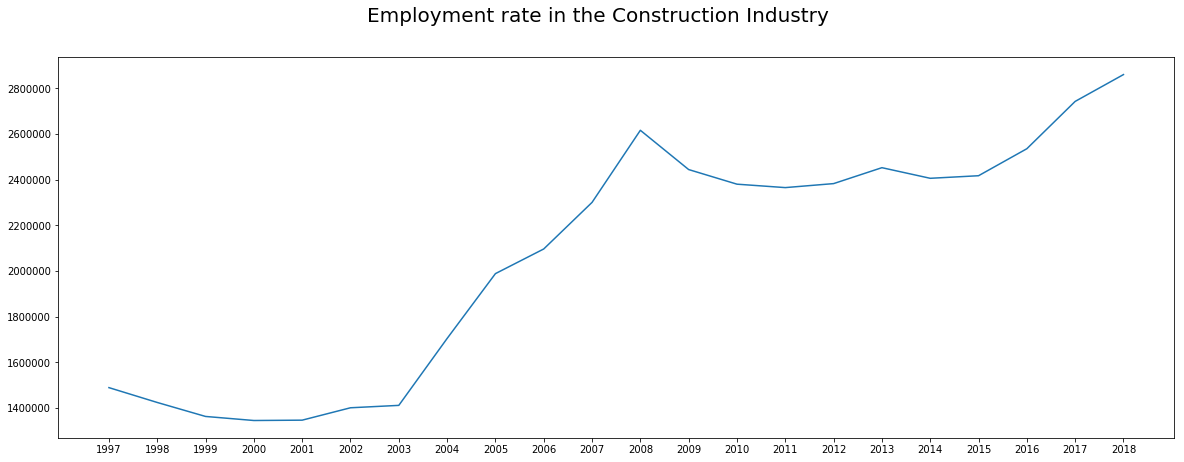

In [34]:
#plot employment rate across the years

fig1, ax1 = plt.subplots()
fig1.set_size_inches([20,7])
ax1.plot(construction_employment_by_year.index, construction_employment_by_year.values)
ax1.set_xticks(range(1997, 2019))
fig1.suptitle("Employment rate in the Construction Industry", fontsize=20)
plt.show()

In [35]:
 #How employment in Construction evolved over time, compared to the total employment across all industries.
    # Let us consider what the percentage of total employment in construction from 
# the sum total of employments in all industries

percentage = (construction["Employment"].sum() / data_output["Employment"].sum()) * 100
print(percentage)

11.566374741895782


In [36]:
#For the other industries (excluding the construction industry) in total, how has their growth rate been?
# Let us extract the data of other industries, excluding construction
other_industriesA = data_output.loc[np.invert(data_output["LMO_Detailed_Industry"] == "Construction")]

#Group other industries employment data into years and get each year's sum
other_industriesA_employment_by_year = other_industriesA.groupby(['SYEAR'])["Employment"].sum()

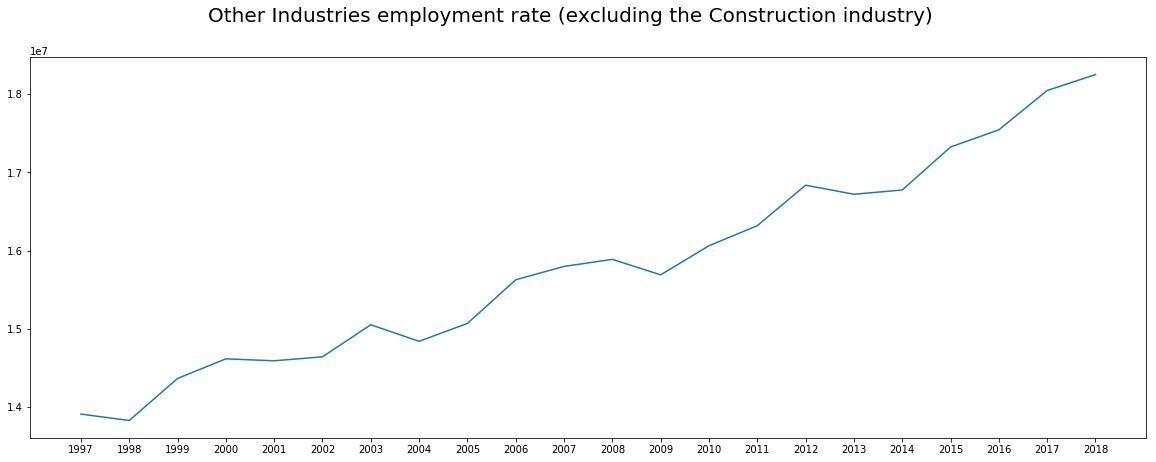

In [37]:
#plot other industries employment rate
fig2, ax2 = plt.subplots()
fig2.set_size_inches([20,7])

ax2.plot(other_industriesA_employment_by_year.index, other_industriesA_employment_by_year.values)
ax2.set_xticks(range(1997, 2019))
fig2.suptitle("Other Industries employment rate (excluding the Construction industry)", fontsize=20)
plt.show()

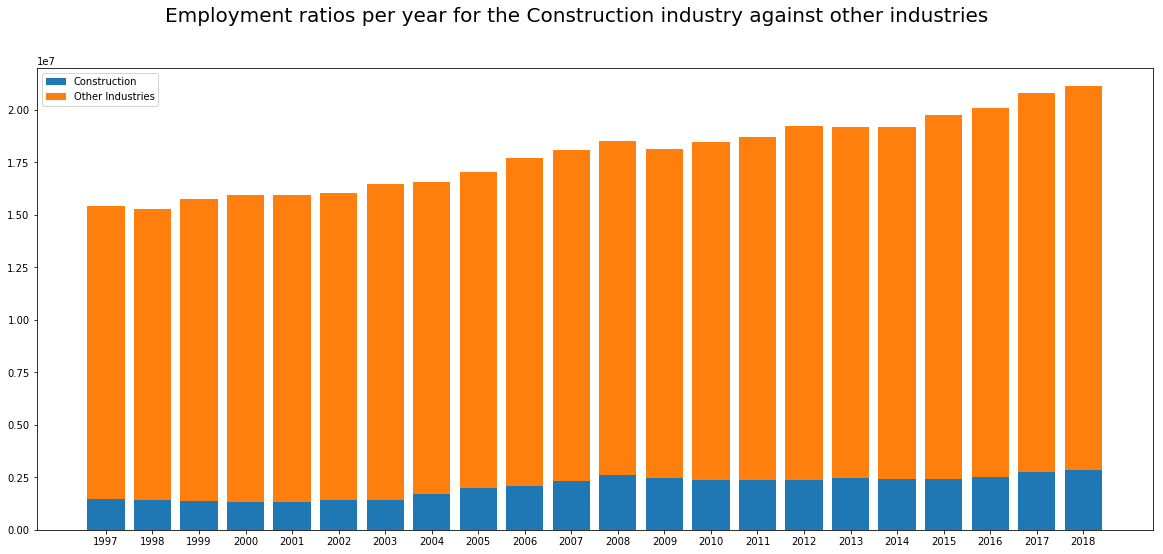

In [46]:
#compare the total employment rate of the industries against the construction industry
fig3, ax3 = plt.subplots()
fig3.set_size_inches([20,8.5])

ax3.bar(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction")
ax3.bar(other_industriesA_employment_by_year.index, other_industriesA_employment_by_year.values, \
        bottom=construction_employment_by_year.values, label="Other Industries")

ax3.set_ylim([0, 22000000])
ax3.set_xticks(range(1997, 2019))

fig3.suptitle("Employment ratios per year for the Construction industry against other industries", fontsize=20)

plt.legend()

plt.show()

In [48]:
# create a dataframe with industry wise employment summary
industry_wise_summary = data_output.groupby(["LMO_Detailed_Industry"])["Employment"].sum()
industry_wise_summary.head()

LMO_Detailed_Industry
Accommodation services                              9669500
Air transportation                                  3745250
Ambulatory health care services                    17292750
Amusement, gambling and recreation industries       8717750
Architectural, engineering and related services     8925250
Name: Employment, dtype: int64

Text(0.5, 1.0, 'Employment wise Top 10 Industries Bar plot')

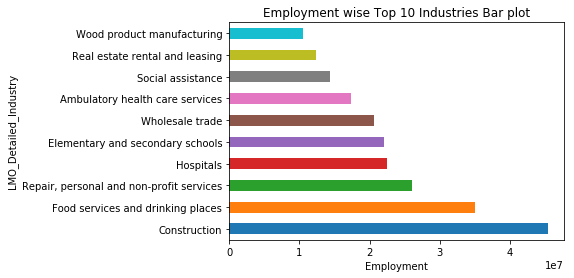

In [50]:
# Plotting employment wise top 10 Industries.
industry_wise_summary.sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel("Employment")
plt.title("Employment wise Top 10 Industries Bar plot")

In [52]:
#How has the employment of Food services and drinking places staffs evolved over time?
#slice the data_output DataFrame and extract rows for Hospitals employment data
Food_services = data_output.loc[data_output["LMO_Detailed_Industry"] == "Food services and drinking places"]
Food_services.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 16 to 15533
Data columns (total 5 columns):
SYEAR                    264 non-null int64
SMTH                     264 non-null int64
LMO_Detailed_Industry    264 non-null object
Employment               264 non-null int64
NAICS                    264 non-null object
dtypes: int64(3), object(2)
memory usage: 12.4+ KB


In [53]:
#Group Hospitals employment data into years and get each year's sum
Food_services_employment_by_year = Food_services.groupby(['SYEAR'])["Employment"].sum()

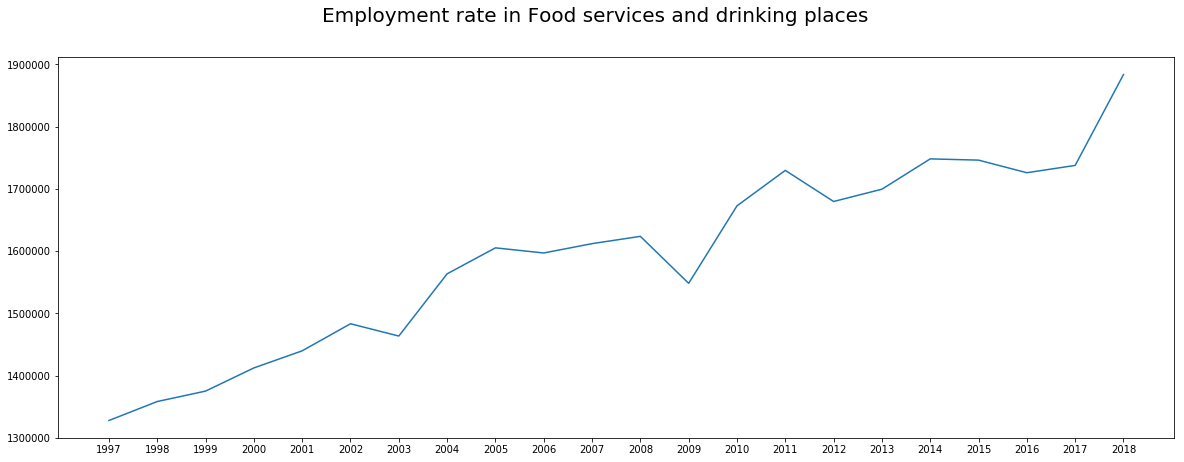

In [54]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches([20,7])
ax4.plot(Food_services_employment_by_year.index, Food_services_employment_by_year.values)
ax4.set_xticks(range(1997, 2019))
fig4.suptitle("Employment rate in Food services and drinking places ", fontsize=20)
plt.show()

In [55]:
#How employment of Food services and drinking places has evolved over time, compared to the total employment across all industries?
# Let us consider what the percentage of total employment of Hospital staffs from 
# the sum total of employments in all industries

percentage = (Food_services["Employment"].sum() / data_output["Employment"].sum()) * 100
print(percentage)

8.908600591986819


In [56]:
# Let us extract the data of other industries, excluding construction
other_industriesB = data_output.loc[np.invert(data_output["LMO_Detailed_Industry"] == "Food services and drinking places")]

other_industriesB_employment_by_year = other_industriesB.groupby(['SYEAR'])["Employment"].sum()

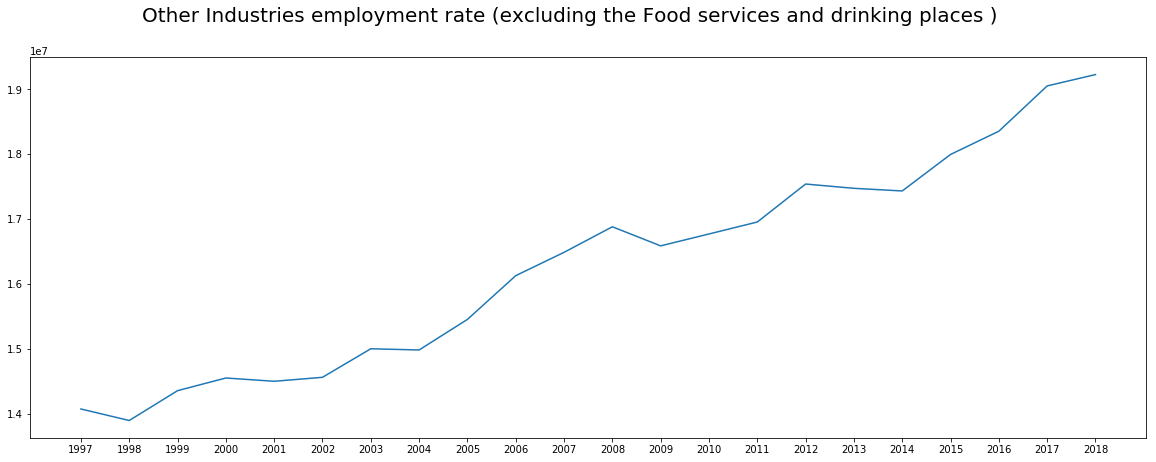

In [58]:
#the growth rate of other industries (excluding the Food services and drinking places) in total, how has their growth rate been?
fig5, ax5 = plt.subplots()
fig5.set_size_inches([20,7])

ax5.plot(other_industriesB_employment_by_year.index, other_industriesB_employment_by_year.values)
ax5.set_xticks(range(1997, 2019))
fig5.suptitle("Other Industries employment rate (excluding the Food services and drinking places )", fontsize=20)
plt.show()

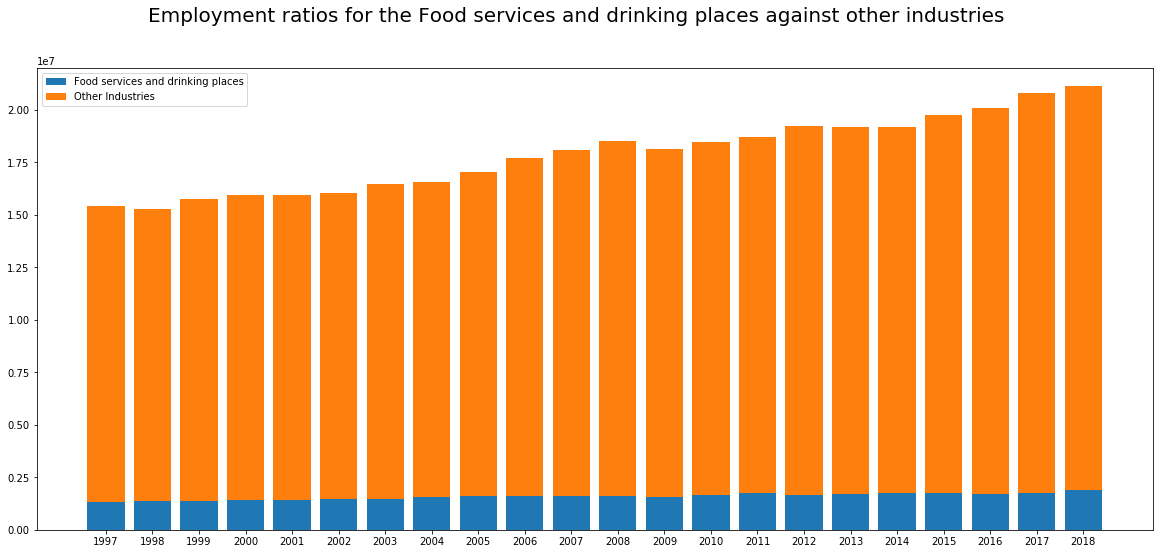

In [60]:
#compare the total employment rate of the industries against that of the Food services and drinking places
fig6, ax6 = plt.subplots()
fig6.set_size_inches([20,8.5])

ax6.bar(Food_services_employment_by_year.index, Food_services_employment_by_year.values, label="Food services and drinking places")
ax6.bar(other_industriesB_employment_by_year.index, other_industriesB_employment_by_year.values, \
        bottom=Food_services_employment_by_year.values, label="Other Industries")

ax6.set_ylim([0, 22000000])
ax6.set_xticks(range(1997, 2019))

fig6.suptitle("Employment ratios for the Food services and drinking places against other industries", fontsize=20)

plt.legend()

plt.show()

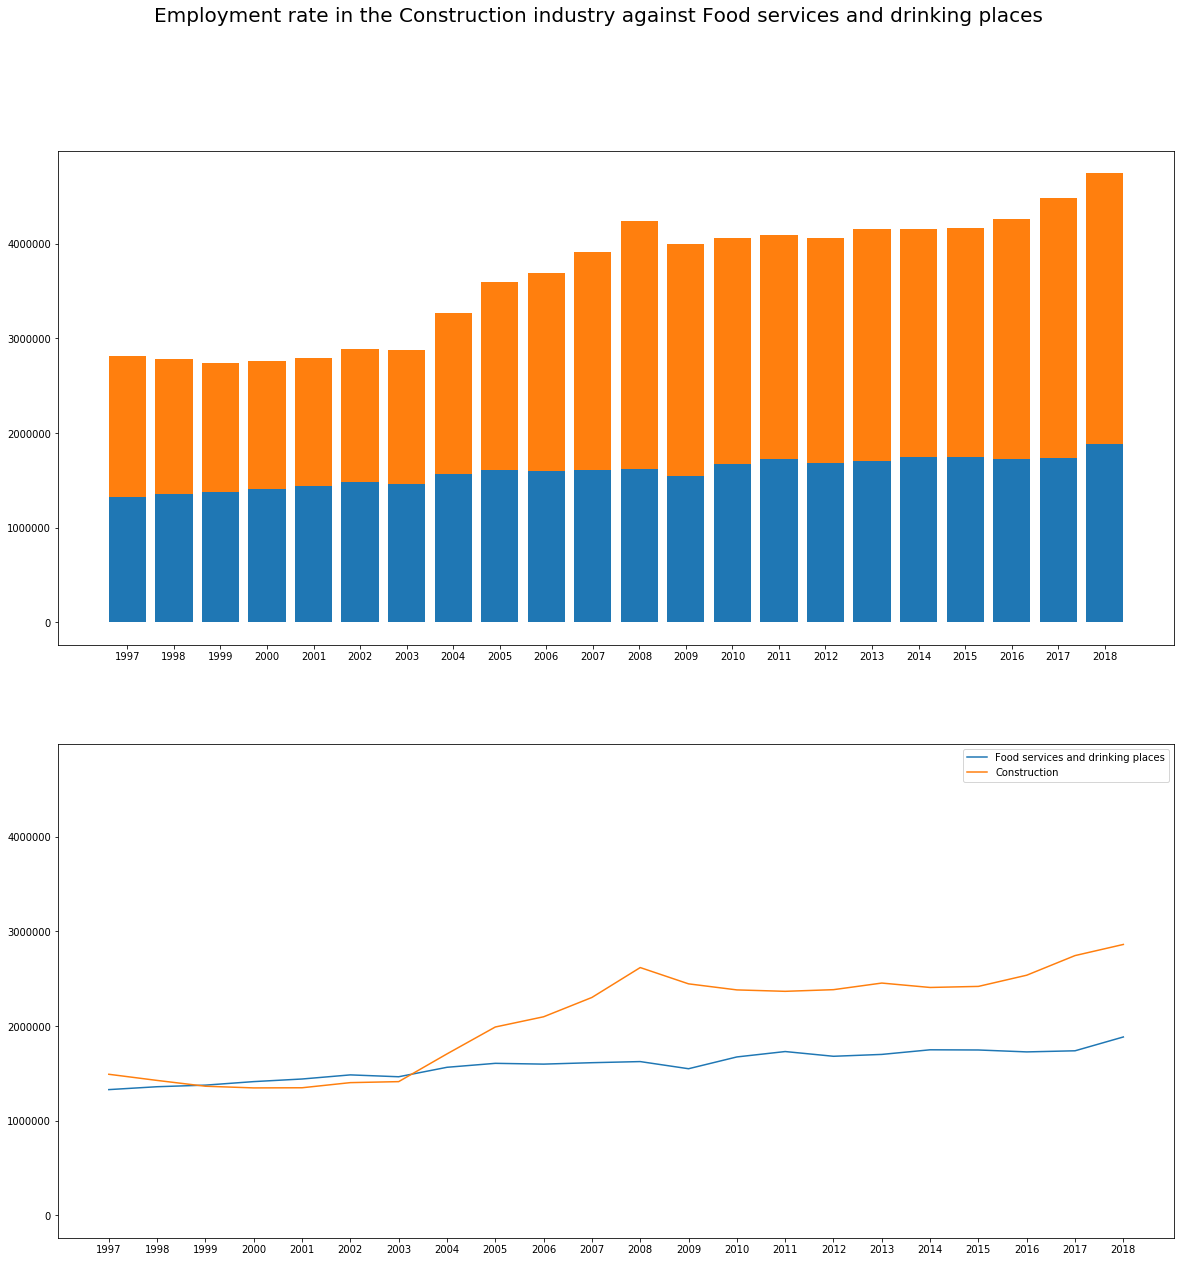

In [62]:
#How has employment in the construction industry and that of  the Food services and drinking places evolved over time?
fig7, ax7 = plt.subplots(2, 1, sharey=True)
fig7.set_size_inches([20,20])

ax7[0].bar(Food_services_employment_by_year.index, Food_services_employment_by_year.values, label="Food services and drinking places")
ax7[0].bar(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction", bottom=Food_services_employment_by_year.values)
ax7[0].set_xticks(range(1997, 2019))

ax7[1].plot(Food_services_employment_by_year.index, Food_services_employment_by_year.values, label="Food services and drinking places")
ax7[1].plot(construction_employment_by_year.index, construction_employment_by_year.values, label="Construction")
ax7[1].set_xticks(range(1997, 2019))

fig7.suptitle("Employment rate in the Construction industry against Food services and drinking places", fontsize=20)

plt.legend()
plt.show()